In [2]:
# Skylar Haskiell
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import pickle
import matplotlib.pyplot as plt
import time

from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# pull in data
df = pd.read_pickle("../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)

In [4]:
# df.head()

In [5]:
docs = df["final_tokens"]  

In [6]:
# df.shape

In [7]:
#counts number of abstracts that contain 'computing'
term_match_int = []
for i, abstract in enumerate(docs):
        if ('computing' in abstract):
            term_match_int.append(i)

In [8]:
len(term_match_int)

16077

In [9]:
# grabs all computing and cloud matches

term_match_idx = []

for i, abstract in enumerate(docs):
    if ('computing' in abstract): 
        if ('cloud' in abstract or 'super' in abstract):
            term_match_idx.append(i)

In [10]:
len(term_match_idx) 

4057

In [11]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(docs)

terms = vectorizer.get_feature_names()

In [12]:
dtm.shape

(1143869, 1629626)

In [13]:
#checks for all terms relating to internet 
count = 0

for term in terms:
    if 'computing' in term:
        
            print(term)
            count = count + 1
        
print(count)

31computing
6computing
acceleratedcomputing
accesscomputing
advancedcomputing
andbiocomputing
andcomputing
andsupercomputing
associatedcomputing
basedcomputing
beowulfcomputing
biocomputing
biocomputing_cgrb
biocomputing_visualization
biocomputing_visualization_informatics_rbvi
biocomputinginfrastructure
biomedical_supercomputing_nrbsc
biomedicalcomputing
centeredcomputing
cloud_computing
cloud_computing_web_crawler
cloudcomputing
cmu_pittsburgh_supercomputing
cognitivecomputing
computing
computing10
computing2
computing3
computing4
computing4good
computing_a4rc
computing_base
computing_hpc
computing_initiative_nsci
computing_namic
computing_part
computing_systems_icdcs
computingabstract
computingabstractsynthetic
computingadministrator
computingadvisory
computingaim
computingalgorithm
computingand
computingapplication
computingarchitecture
computingat
computingb
computingbela
computingbinde
computingbrief
computingcan
computingcapability
computingcenter
computingcircuits
computingcogn

In [14]:
#total number of terms relating to the word internet 
term_counts = dtm.sum(axis=0)

In [15]:
#checks terms with both internet and thing or iot
icount = 0
for term in terms:
    if 'computing' in term:
        if 'super' in term or 'cloud' in term:
            print(term)
            icount = icount + 1
        
print(icount)

andsupercomputing
biomedical_supercomputing_nrbsc
cloud_computing
cloud_computing_web_crawler
cloudcomputing
cmu_pittsburgh_supercomputing
minnesota_supercomputing
minnesotasupercomputing
pittsburg_supercomputing
pittsburgh_supercomputing
pittsburgh_supercomputing_centerpsc
pittsburgh_supercomputingcenter
san_diego_supercomputing
scientificsupercomputing
supercomputing
supercomputing_11
supercomputing_applications
supercomputing_applications_ncsa
supercomputing_nrbsc
supercomputing_pittsburgh_supercomputing
supercomputingcenter
21


In [16]:
#will create set of all terms with internet and thing or iot and list their frequency
di = {}

for i, term in enumerate(terms):
    if 'computing' in term:
        if 'cloud' in term or 'super' in term:
        #print(term)
            di[term] = term_counts[0,i]

In [17]:
di

{'andsupercomputing': 6,
 'biomedical_supercomputing_nrbsc': 19,
 'cloud_computing': 1765,
 'cloud_computing_web_crawler': 8,
 'cloudcomputing': 19,
 'cmu_pittsburgh_supercomputing': 10,
 'minnesota_supercomputing': 24,
 'minnesotasupercomputing': 1,
 'pittsburg_supercomputing': 6,
 'pittsburgh_supercomputing': 136,
 'pittsburgh_supercomputing_centerpsc': 7,
 'pittsburgh_supercomputingcenter': 9,
 'san_diego_supercomputing': 12,
 'scientificsupercomputing': 1,
 'supercomputing': 517,
 'supercomputing_11': 1,
 'supercomputing_applications': 22,
 'supercomputing_applications_ncsa': 19,
 'supercomputing_nrbsc': 4,
 'supercomputing_pittsburgh_supercomputing': 8,
 'supercomputingcenter': 2}

In [18]:
docs_ix = np.concatenate([term_match_idx]) 

In [19]:
docs_idx = np.unique(docs_ix)

In [20]:
# docs_idx.shape

In [21]:
filt_corpus = df.loc[docs_idx, :]

In [22]:
#removes abstracts with no terms from data set
filt_corpus = filt_corpus[~filt_corpus.PROJECT_TERMS.isnull()]

In [23]:
#calculates the top 40 keywords in the data set

wrd_frq = pd.Series(' '.join(filt_corpus.PROJECT_TERMS).split())
#makes lowercase
wrd_frq = wrd_frq.str.lower()
# removes trailing ;
wrd_frq = wrd_frq.str.rstrip(";")
# removes trailing s
wrd_frq = wrd_frq.str.rstrip("s")
#counts word freqeuncy
wrd_frq = wrd_frq.value_counts()

In [24]:
wrd_frq[0:40]

research          8924
data              7366
computer          4169
system            3853
computing         3148
development       2657
resource          2636
software          2433
science           2359
technology        2046
student           1963
design            1922
tool              1915
base              1877
modeling          1831
performance       1829
of                1812
proce             1724
program           1710
health            1697
personnel         1669
training          1515
infrastructure    1488
work              1486
cloud             1385
time              1383
method            1374
goal              1350
service           1335
environment       1284
and               1265
communitie        1250
grant             1237
high              1213
novel             1192
source            1188
disease           1175
simulation        1157
addre             1143
clinical          1140
dtype: int64

In [25]:
filt_corpus["FY"] = filt_corpus["FY"].astype('int')

In [26]:
year_counts = filt_corpus['FY'].value_counts().sort_index(ascending=True)
print(year_counts)

2008    160
2009    229
2010    269
2011    273
2012    261
2013    261
2014    281
2015    324
2016    352
2017    388
2018    433
2019    129
2020    149
Name: FY, dtype: int64


In [27]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}

<ipython-input-29-24013e5304d6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


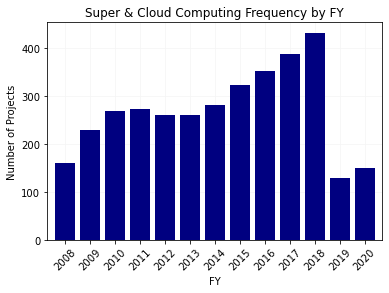

In [29]:
year = year_counts.index.tolist()
count = year_counts.values

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt.xlim(2007.3,2020.7)
plt.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY")
plt.ylabel("Number of Projects")
plt.title("Super & Cloud Computing Frequency by FY")

plt.savefig("startyr_freq.png", dpi = 800, bbox_inches = "tight")
plt.savefig("startyr_freq.pdf", dpi = 800, bbox_inches = "tight")